# **1. INTRODUCTION**

- Nama : Daniel
- Batch : HCK-001

# **2. IMPORT LIBRARY**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# **3. DATA LOADING**

In [3]:
df = pd.read_csv("/Users/daniel/Desktop/Hacktiv_8/Assignment/Phase_1/data/rideshare_kaggle.csv")
df.T

,0,1,2,3,4,5,6,7,8,9,...,693061,693062,693063,693064,693065,693066,693067,693068,693069,693070
id,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,4bd23055-6827-41c6-b23b-3c491f24e74d,981a3613-77af-4620-a42a-0c0866077d1e,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,462816a3-820d-408b-8549-0b39e82f65ac,474d6376-bc59-4ec9-bf57-4e6d6faeb165,4f9fee41-fde3-4767-bbf1-a00e108701fb,8612d909-98b8-4454-a093-30bd48de0cb3,...,54362c72-124b-47e8-8d07-62a07cfff624,64a50889-d05b-49de-b416-1802db5c27ac,6c1d9207-a9af-431e-a65f-3d9d205f28bf,25ed29df-4f9c-4aac-8218-681427f1d738,353e6566-b272-479e-a9c6-98bd6cb23f25,616d3611-1820-450a-9845-a9ff304a4842,633a3fc3-1f86-4b9e-9d48-2b7132112341,64d451d0-639f-47a4-9b7c-6fd92fbd264f,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda
timestamp,1544952607.89,1543284023.677,1543366822.198,1543553582.749,1543463360.223,1545071112.138,1543208580.2,1543780384.677,1543818482.645,1543315522.249,...,1543728484.0,1543728484.0,1543728484.0,1543728484.0,1543708386.0,1543708386.0,1543708386.0,1543708386.0,1543708386.0,1543708386.0
hour,9,2,1,4,3,18,5,19,6,10,...,5,5,5,5,23,23,23,23,23,23
day,16,27,28,30,29,17,26,2,3,27,...,2,2,2,2,1,1,1,1,1,1
month,12,11,11,11,11,12,11,12,12,11,...,12,12,12,12,12,12,12,12,12,12
datetime,2018-12-16 09:30:07,2018-11-27 02:00:23,2018-11-28 01:00:22,2018-11-30 04:53:02,2018-11-29 03:49:20,2018-12-17 18:25:12,2018-11-26 05:03:00,2018-12-02 19:53:04,2018-12-03 06:28:02,2018-11-27 10:45:22,...,2018-12-02 05:28:04,2018-12-02 05:28:04,2018-12-02 05:28:04,2018-12-02 05:28:04,2018-12-01 23:53:05,2018-12-01 23:53:05,2018-12-01 23:53:05,2018-12-01 23:53:05,2018-12-01 23:53:05,2018-12-01 23:53:05
timezone,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,...,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York
source,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square,Back Bay,Back Bay,Back Bay,Back Bay,...,Theatre District,Theatre District,Theatre District,West End,West End,West End,West End,West End,West End,West End
destination,North Station,North Station,North Station,North Station,North Station,North Station,Northeastern University,Northeastern University,Northeastern University,Northeastern University,...,Haymarket Square,Haymarket Square,Haymarket Square,North End,North End,North End,North End,North End,North End,North End
cab_type,Lyft,Lyft,Lyft,Lyft,Lyft,Lyft,Lyft,Lyft,Lyft,Lyft,...,Uber,Uber,Uber,Uber,Uber,Uber,Uber,Uber,Uber,Uber


**3.1 Total columns and rows**

- There aree originally 57 columns and 693071 rows in our dataset.

In [4]:
#Assign random seed so the data inference won't change
np.random.seed(10)

#Generate data inference
data_inf =  df.sample(1)
data_inf.isnull().sum(axis=1)

479078    1
dtype: int64

**3.2 Getting Data Inference**
- We take one rows from sample as data inference for later tested with our model.
- Ensure there is no missing variable in the data inference.

In [5]:
data_inf

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
479078,0be75a58-949c-47b4-98ed-37de32b4bc5d,1.544916e+09,23,15,12,2018-12-15 23:20:10,America/New_York,Haymarket Square,Beacon Hill,Uber,...,0.0081,1544893200,39.68,1544929200,54.46,1544896800,36.43,1544929200,53.79,1544896800


**3.3 Data Inference Preview**
- The data inference is taken from data index 379178.

In [6]:
df.drop(index=data_inf.index, inplace=True)

**3.4 Dropping Data Inference from Original Dataset**
- Deleting the inference data from the original dataset, so later the model will predict the brand new data and so there is no duplicated data either.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693070 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693070 non-null  object 
 1   timestamp                    693070 non-null  float64
 2   hour                         693070 non-null  int64  
 3   day                          693070 non-null  int64  
 4   month                        693070 non-null  int64  
 5   datetime                     693070 non-null  object 
 6   timezone                     693070 non-null  object 
 7   source                       693070 non-null  object 
 8   destination                  693070 non-null  object 
 9   cab_type                     693070 non-null  object 
 10  product_id                   693070 non-null  object 
 11  name                         693070 non-null  object 
 12  price                        637976 non-null  float64
 13 

**3.5 Looking insight from info method**
- There is one column with missing value, that is 'price' column.
- We have 29 columns with float data, 17 columns with int64, and 11 columns with object data.

In [8]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

**3.6 Getting column names**
- Here we can grab all the column names as above.

In [9]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55094
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

**3.7 Counting missing value**
- There are 55095 columns in the 'price' column, around 7.9% of total dataset.

In [10]:
df.dropna(inplace=True)

**3.8 Dropping missing value**
- We drop the missing value since the price column will be our target/label.
- Suppose it's not the target, because the total amount 7.9% we can drop it and won't affect the data as well.

In [11]:
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

**3.9 Re-checking missimg value**
- There is no missing value anymore in our dataset.

# **4. Exploratory Data Analysis (EDA)**

Total unique variabel in hour columns is : 24
Total unique variabel in day columns is : 17
Total unique variabel in month columns is : 2


<AxesSubplot:xlabel='month', ylabel='count'>

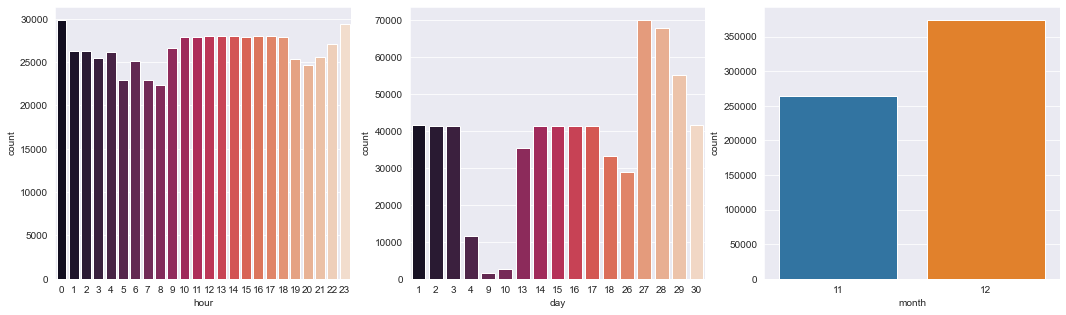

In [12]:
#Set style to darkgrid
sns.set_style('darkgrid')

#Counting how many unique variabel in 'hour' column
print("Total unique variabel in hour columns is :", df['hour'].nunique())
print("Total unique variabel in day columns is :", df['day'].nunique())
print("Total unique variabel in month columns is :", df['month'].nunique())

#Counting the distribution of value in 'hour' column
fig, ax = plt.subplots(1,3, figsize=(18, 5))
sns.countplot(data=df, x='hour', ax=ax[0], palette='rocket')
sns.countplot(data=df, x='day', ax=ax[1], palette='rocket')
sns.countplot(data=df, x='month', ax=ax[2])

**4.1 Analisyng total value in column 'hour', 'day' & 'month'**

From the code and visulization above we know that :
- There are 24 unique value/variables in 'hour' column which shows time of a day, and all of them are distributed evenly.
- There are 17 unique value/variables in 'day' which each of them indicates date of a month. 
There is no record for date 5th, 6th, 7th, 8th, 11th, 12th, 19th, 20th, 21st, 22nd, ,23rd, 24th, 25th, 31st. The data for the date 4th, 9th and 10th are lower than other dates.
- There are only two data record in column 'month', they are November (11) and December (12). Total data is not really different, even November data is a bit lower.

<AxesSubplot:xlabel='month', ylabel='counts'>

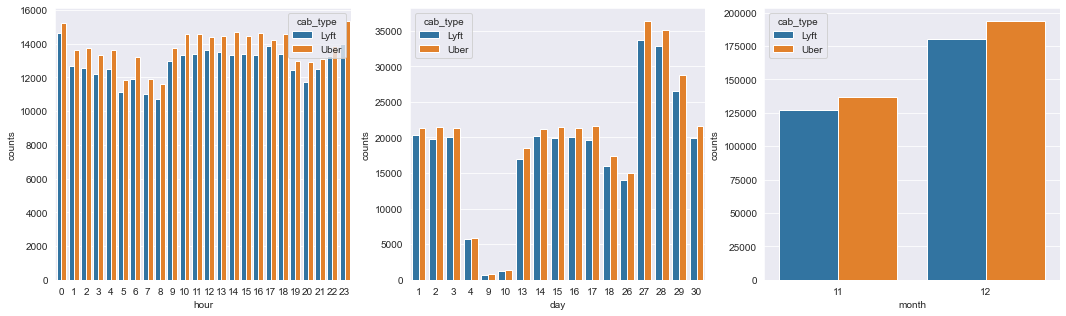

In [13]:
fig, ax = plt.subplots(1,3, figsize=(18, 5))

#Grouping by hour, day, month respectively for visualizing the cab type by the group
df_group_by_hour_type = df.groupby(by=['hour', 'cab_type']).size().reset_index(name="counts")
df_group_by_day_type = df.groupby(by=['day', 'cab_type']).size().reset_index(name="counts")
df_group_by_month_type = df.groupby(by=['month', 'cab_type']).size().reset_index(name="counts")

#Visualizing the cab type by hour, day and month
sns.barplot(data=df_group_by_hour_type, x='hour', y='counts', hue='cab_type', ax=ax[0])
sns.barplot(data=df_group_by_day_type, x='day', y='counts', hue='cab_type', ax=ax[1])
sns.barplot(data=df_group_by_month_type, x='month', y='counts', hue='cab_type', ax=ax[2])

**4.2 Analysing the cab_type based on hour, day and month**
- Both Lyft & Uber almost share the total customer evenly. Although, we can see clearly that Uber always has more customer a bit higher than Lyft.

Total unique variabel in hour columns is : 12
Total unique variabel in day columns is : 12


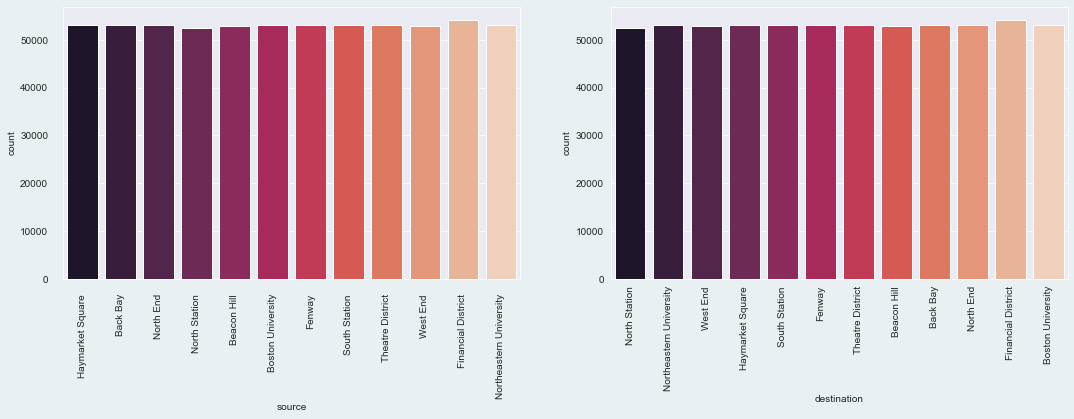

In [14]:
#Counting how many unique variabel in 'hour' column
print("Total unique variabel in hour columns is :", df['source'].nunique())
print("Total unique variabel in day columns is :", df['destination'].nunique())

#Counting the distribution of value in 'hour' column
fig, ax = plt.subplots(1,2, figsize=(18, 5))
sns.countplot(data=df, x='source', ax=ax[0], palette='rocket')
sns.countplot(data=df, x='destination', ax=ax[1], palette='rocket')
fig.patch.set_facecolor((0.91, 0.94, 0.949))

#Configuring and rotating the ax[0] label
ax[0].set_xticklabels(['Haymarket Square', 'Back Bay', 'North End', 'North Station',
       'Beacon Hill', 'Boston University', 'Fenway', 'South Station',
       'Theatre District', 'West End', 'Financial District',
       'Northeastern University'], rotation=90)

#Configuring and rotating the ax[1] label
ax[1].set_xticklabels(['North Station', 'Northeastern University', 'West End',
       'Haymarket Square', 'South Station', 'Fenway', 'Theatre District',
       'Beacon Hill', 'Back Bay', 'North End', 'Financial District',
       'Boston University'], rotation=90)

ax[0].tick_params(axis="both", direction="in", pad=15)

**4.3 Analysing total value in source and destination**
- There are 12 unique values in both source and destinaton column.
- All of them almost have the same amount of data.

<AxesSubplot:>

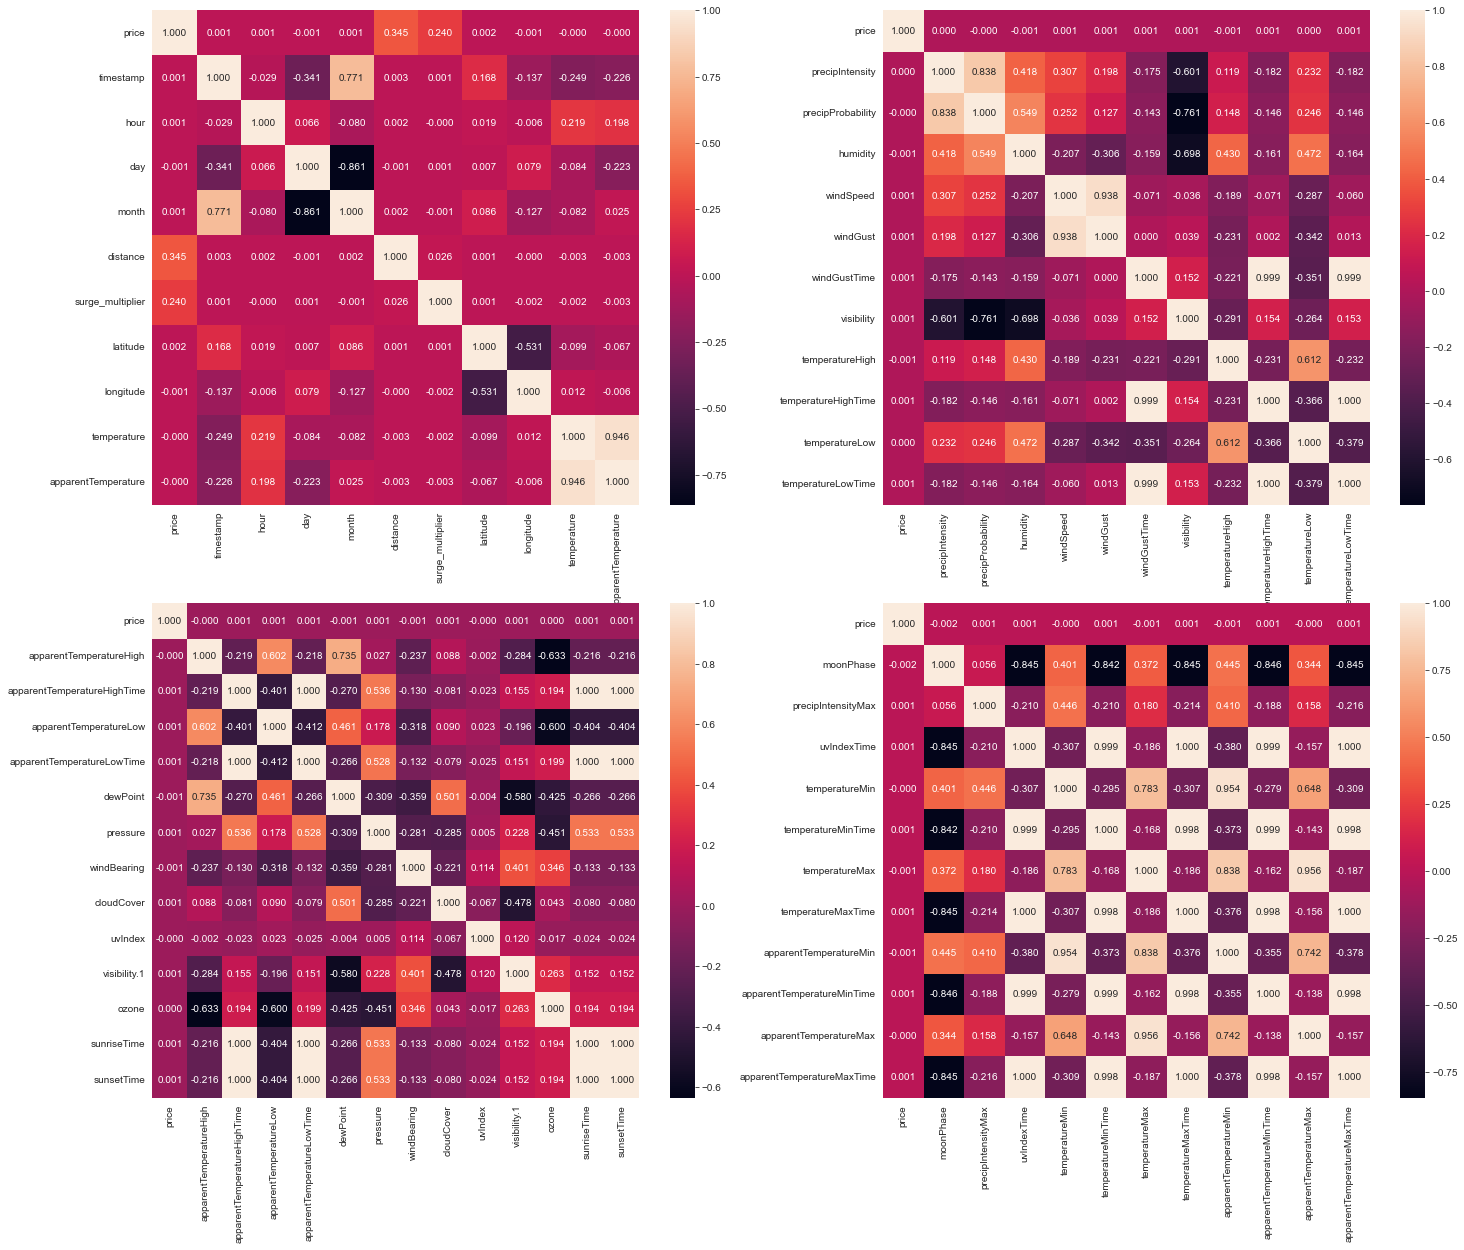

In [15]:
#Grouping column for easy visualization
first_group_column = df[['price', 'id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone','source', 'destination', 
    'cab_type', 'product_id', 'name', 'distance', 'surge_multiplier','latitude', 'longitude', 'temperature','apparentTemperature']]
second_group_column = df[['price','short_summary', 'long_summary','precipIntensity', 'precipProbability', 
    'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh','temperatureHighTime', 'temperatureLow', 'temperatureLowTime']]
third_group_column = df[['price', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime']]
fourth_group_column = df[['price', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime']]


# Heatmap Correlation Matrix
fig, ax = plt.subplots(2, 2, figsize=(24, 20))
sns.heatmap(first_group_column.corr(), annot=True, fmt='.3f', ax=ax[0,0])
sns.heatmap(second_group_column.corr(), annot=True, fmt='.3f', ax=ax[0,1])
sns.heatmap(third_group_column.corr(), annot=True, fmt='.3f', ax=ax[1,0])
sns.heatmap(fourth_group_column.corr(), annot=True, fmt='.3f', ax=ax[1,1])

**4.4 Analysing correlation between target and features**
- Here, I'm using heatmap correlation matrix to show correlation between target (price) and the rest of features.
- However, since there are 57 total columns in this dataset, I separated them to 4 matrix so we can easily comprehend all of them.
- Also, I only take three decimal in the coefficient of correlation maartrix.

From the matrix we understand that :
- With 3 two decimal setting, only distance and surge_multiplier show indication of correlation.
- The category columns are not shown in the matrix since we have to encode them in the first place. We'll do this in the next step (4.5).
- Some of the columns will be dropped in the feature engineering & selection step, since they don't have any correlation with target.



<AxesSubplot:>

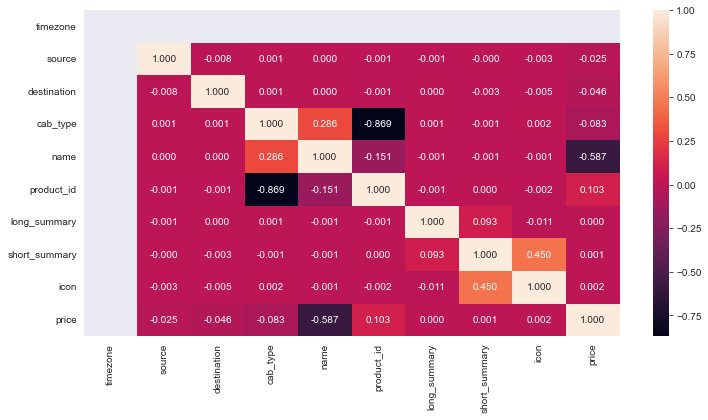

In [16]:
#Assign label encoder to variable
label_en = preprocessing.LabelEncoder()

#Select all the category columns
df_cat_column = df[['timezone', 'source', 'destination', 'cab_type', 'name', 'product_id', 'long_summary', 'short_summary', 'icon','price']]

#Encode the category columns
df_cat_encode = df_cat_column.copy()
for col in df_cat_encode.select_dtypes(include='O').columns:
    df_cat_encode[col]=label_en.fit_transform(df_cat_encode[col])
    
#Showing plot
plt.figure(figsize=(12,6))
sns.heatmap(df_cat_encode.corr(), fmt='.3f', annot=True)

**4.5 Analysing correlation between target and category columns**
- After encoded the category columns we do the same like we did in thee 4.4.
- name is the only feature that shows strong correlation (above +/-0.5) related to the target.
- Some of these columns may be dropped in the feature engineering & selection step since some of them are not have impact to the target.

<AxesSubplot:xlabel='price', ylabel='hour'>

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


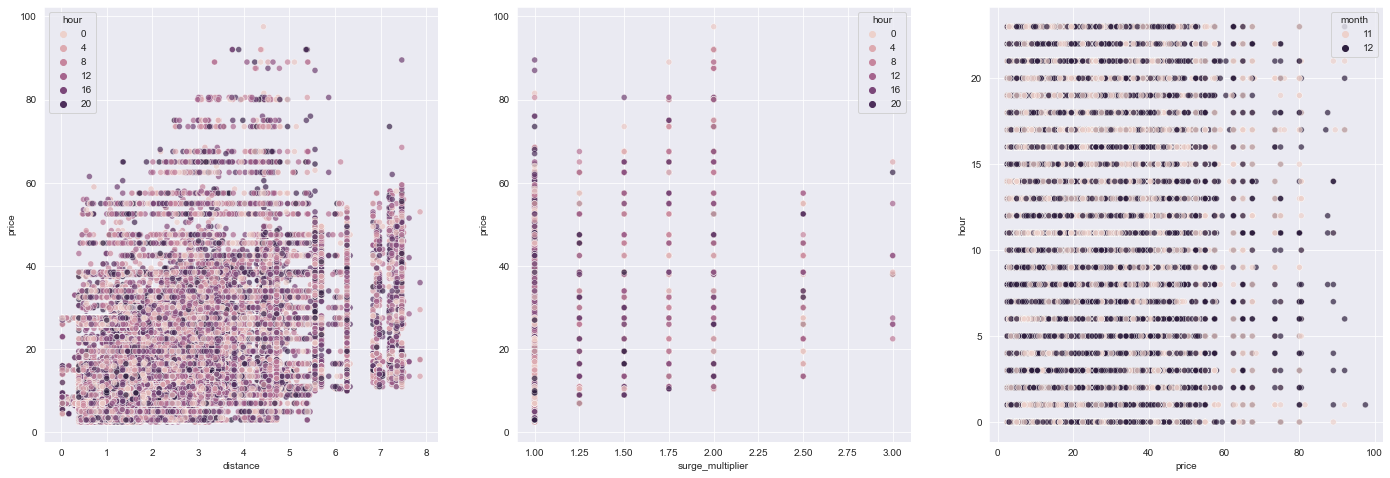

In [17]:
#Plotting some features(distance, surge_multiplier, price with the target and other features)
fig, ax = plt.subplots(1, 3, figsize=(24, 8))
sns.scatterplot(data=df, x='distance', y='price', hue='hour', ax=ax[0], alpha=0.7)
sns.scatterplot(data=df, x='surge_multiplier', y='price', hue='hour', ax=ax[1], alpha=0.7)
sns.scatterplot(data=df, x='price', y='hour', hue='month', ax=ax[2], alpha=0.7)

**4.6 Analysing further corrleation between target and distance, surge_multiplier and hour.**
- In the left figure we can understand that the price will get higher if the distance get farther.
- So does with surge_multiplier, so we can use both features to predict the linear regression as 2nd figure tell us.
- It seems month and hour have correlation eventhough it's not too strong with the target as shown in third figure, so we can include these features as well.

<AxesSubplot:xlabel='price', ylabel='destination'>

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


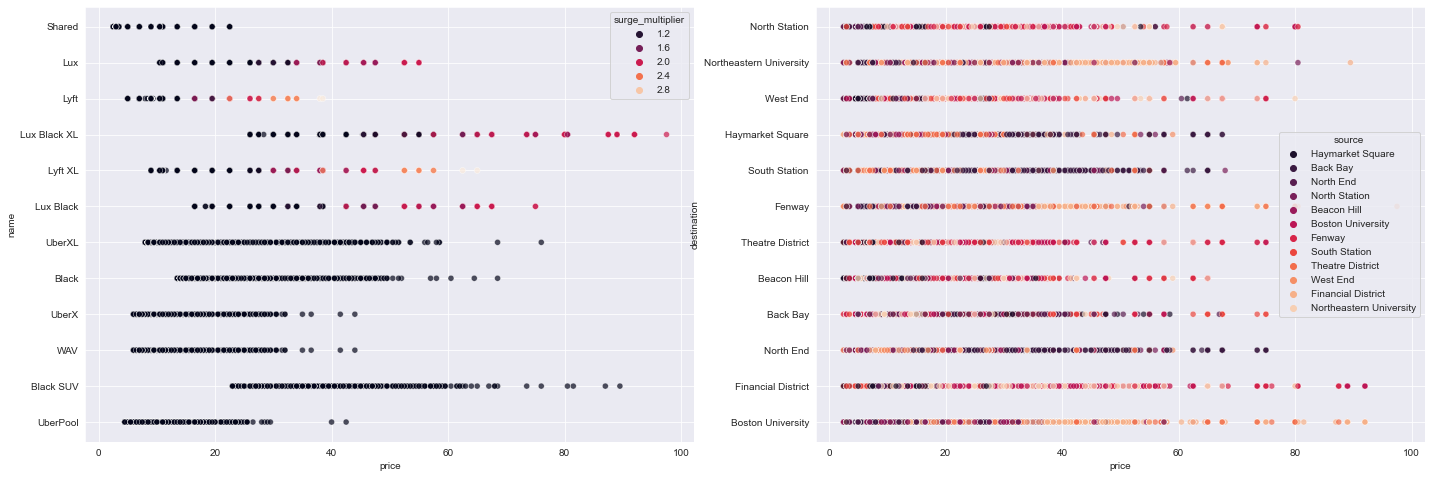

In [18]:
fig, ax=plt.subplots(1, 2, figsize=(24, 8))
sns.scatterplot(data=df, x='price', y='name', hue='surge_multiplier', ax=ax[0], palette='rocket', alpha=0.7)
sns.scatterplot(data=df, x='price', y='destination', hue='source', ax=ax[1], palette='rocket', alpha=0.7)

# 5. Featuring Engineer & Selection

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='price')
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=76)

In [20]:
y_train.shape

(510380,)

In [21]:
X_train.shape

(510380, 56)

**5.1 Splitting the Data**
- Here we split the data from X and Y as well as from train and test data.

Kurtosis from price is  1.2356025282084535
Skewnes from price is  1.049204379033992
Columns y is right skewed


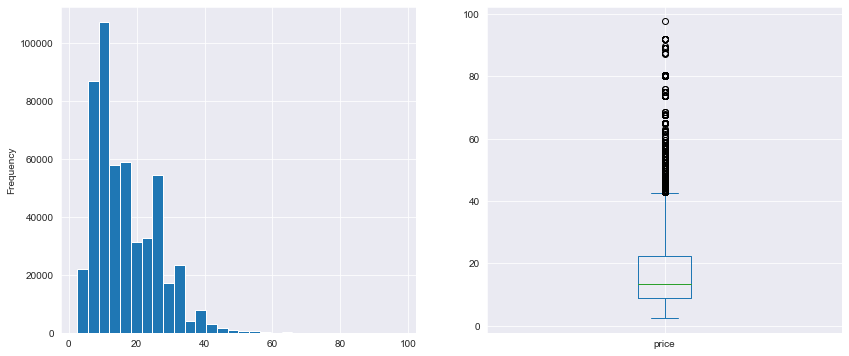

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
y_train.plot(kind='hist', ax=ax[0], bins=30)
y_train.plot(kind='box', ax=ax[1])

print('Kurtosis from price is ', y_train.kurt())
print('Skewnes from price is ', y_train.skew())

if -0.5 <= y_train.skew() <= 0.5:
    print("Columns y is normal distribution")
elif y_train.skew() > 0.5:
    print("Columns y is right skewed")
elif y_train.skew() < -0.5:
    print("Columns y is left skewed")

**5.2 Analysing outliers and data distributin from target**
- From plot shown above we can understand that the price column is right skew and there are some outliers.
- We'll use Tuckey's formula for handle the outliers.

In [23]:
#Counting Quartiles 
quartiles = np.percentile(y_train, [25, 50, 75])

#Counting bottom and upper outliers
iqr = quartiles[2] - quartiles[0]
upper_outliers = quartiles[2] + 1.5 * iqr
bottom_outliers = quartiles[0] - 1.5 * iqr

y_train_clean = y_train[(y_train > bottom_outliers) & (y_train < upper_outliers)]

**5.3 Cleaning data target from outliers**
- Here we clean data from outliers from y_train

Kurtosis from price is  -0.3214000467584692
Skewnes from price is  0.7651516129258069
Columns y is right skewed


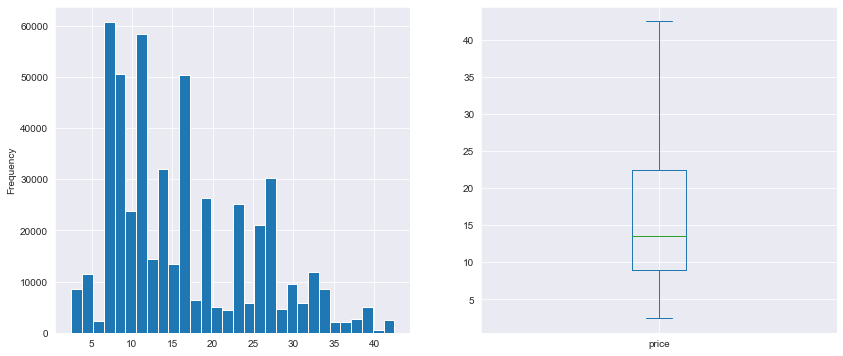

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
y_train_clean.plot(kind='hist', ax=ax[0], bins=30)
y_train_clean.plot(kind='box', ax=ax[1])

print('Kurtosis from price is ', y_train_clean.kurt())
print('Skewnes from price is ', y_train_clean.skew())

if -0.5 <= y_train_clean.skew() <= 0.5:
    print("Columns y is normal distribution")
elif y_train_clean.skew() > 0.5:
    print("Columns y is right skewed")
elif y_train_clean.skew() < -0.5:
    print("Columns y is left skewed")

**5.4 Plotting once again the target data**
- Here, the data is clean from outliers.
- It still does have outliers, but it's just 0.2 higher than normal one (normal coefficient is -0.5 until 0.5). So we can proceed as it is.

In [25]:
y_train_clean.shape

(505864,)

**5.5 New shape target**
- After we delete outliers, it becomes 505864 rows in y_train.

In [26]:
total_outliers = y_train[(y_train < bottom_outliers) | (y_train > upper_outliers)]
X_train_clean = X_train.drop(index=total_outliers.index, axis=0)

print('Total outliers is', len(total_outliers), 'from', len(y_train))
print('Which is only', len(total_outliers)/len(y_train)*100, '%.')

Total outliers is 4516 from 510380
Which is only 0.8848309103021278 %.


**5.6 Adjust the X_train**
- We also delete the outliers data using outliers index from y_train.
- now it becomes 505864 rows, the same with y_train.

In [27]:
#Dropping uncessary columns
X_train_clean.drop(columns=['id', 'hour', 'day', 'month', 'timestamp', 'datetime', 'timezone', 'product_id','apparentTemperature', 'humidity', 'short_summary', 'long_summary','precipIntensity', 'precipProbability', 'windGustTime', 'temperatureHigh','temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon', 'dewPoint', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'windSpeed', 'windGust', 'apparentTemperatureMax', 'apparentTemperatureMaxTime', 'visibility', 'pressure'], axis=1, inplace=True)
X_train_clean.head()

,source,destination,cab_type,name,distance,surge_multiplier,latitude,longitude,temperature
346070,Financial District,Boston University,Uber,UberPool,4.44,1.0,42.3661,-71.0631,42.19
114338,Back Bay,Boston University,Uber,Black,1.44,1.0,42.2148,-71.0330,42.34
81742,Theatre District,Boston University,Uber,Black SUV,2.62,1.0,42.3661,-71.0631,54.38
310412,Financial District,Boston University,Uber,UberPool,5.70,1.0,42.3647,-71.0542,38.42
49408,Theatre District,Northeastern University,Uber,Black,1.80,1.0,42.3503,-71.0810,40.29


**5.7 Dropping the columns that previously in 4.4 & 4.5 showing low correlation**
- We drop columns based on 4.5 & 4.5 analysis that related columns don't show any correlation (or even so significant to be considered or influence the target.)

In [28]:
#Splitting the number and category columns
number_columns = X_train_clean[['distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature']]
category_columns = X_train_clean [['source', 'destination', 'cab_type', 'name']]

**5.8 Splitting the category and number columns**

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(number_columns)

X_train_number = scaler.transform(number_columns)
df_X_train_number = pd.DataFrame(X_train_number)
df_X_train_number.head()

,0,1,2,3,4
0,0.563776,0.0,1.000000,0.584254,0.607674
1,0.181122,0.0,0.000000,1.000000,0.611590
2,0.331633,0.0,1.000000,0.584254,0.925868
3,0.724490,0.0,0.990747,0.707182,0.509267
4,0.227041,0.0,0.895572,0.337017,0.558079


**5.9 Scale the number columns**
- Here I use MinMaxScaler because there is outliers eventhough not many of them are left.
- Later I assign them to panda dataframe.

In [30]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe.fit(category_columns)

X_train_ohe = ohe.transform(category_columns).toarray()
df_X_train_ohe = pd.DataFrame(X_train_ohe)
df_X_train_ohe.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**5.10 Encoding the Category Columns**
- Encoding the category column with one hot encoder and make them to be panda dataframe.

In [31]:
X_train_final = pd.concat([df_X_train_number, df_X_train_ohe], axis=1)
X_train_final.head()

,0,1,2,3,4,0,1,2,3,4,...,28,29,30,31,32,33,34,35,36,37
0,0.563776,0.0,1.000000,0.584254,0.607674,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.181122,0.0,0.000000,1.000000,0.611590,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.331633,0.0,1.000000,0.584254,0.925868,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.724490,0.0,0.990747,0.707182,0.509267,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.227041,0.0,0.895572,0.337017,0.558079,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**5.11 The finalizied X_train**
- The above table is the finalized X_train after concatted from encoded category and  scaled number columns.

**PRE PROCESS X_test**

In [32]:
#Dropping uncessary columns
X_test_copy = X_test.copy()
X_test_copy.drop(columns=['id', 'hour', 'day', 'month', 'timestamp', 'datetime', 'timezone', 'product_id','apparentTemperature', 'humidity', 'short_summary', 'long_summary','precipIntensity', 'precipProbability', 'windGustTime', 'temperatureHigh','temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon', 'dewPoint', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'windSpeed', 'windGust', 'apparentTemperatureMax', 'apparentTemperatureMaxTime', 'visibility', 'pressure'], axis=1, inplace=True)
X_test_copy.head()

,source,destination,cab_type,name,distance,surge_multiplier,latitude,longitude,temperature
88308,Beacon Hill,Fenway,Uber,WAV,2.32,1.0,42.3661,-71.0631,40.36
599437,West End,Northeastern University,Lyft,Lyft XL,3.07,1.0,42.3647,-71.0542,40.01
246894,West End,South Station,Uber,UberPool,2.14,1.0,42.3429,-71.1003,32.67
290470,South Station,North Station,Uber,UberPool,2.29,1.0,42.3647,-71.0542,34.59
675906,Back Bay,North End,Lyft,Lux Black,2.38,1.0,42.3519,-71.0643,45.32


**5.12 Dropping columns X_test**
- Dropping unnecessary columns from X_test.

In [33]:
#Splitting the number and category columns
X_test_number_columns = X_test_copy[['distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature']]
X_test_category_columns = X_test_copy[['source', 'destination', 'cab_type', 'name']]

**5.13 Splitting the data between category and number columns**

In [34]:
scaler.fit(X_test_number_columns)

X_test_number_columns = scaler.transform(X_test_number_columns)
df_X_test_number = pd.DataFrame(X_test_number_columns)
df_X_test_number.head()

,0,1,2,3,4
0,0.302632,0.0,1.000000,0.584254,0.559906
1,0.401316,0.0,0.990747,0.707182,0.550770
2,0.278947,0.0,0.846662,0.070442,0.359175
3,0.298684,0.0,0.990747,0.707182,0.409293
4,0.310526,0.0,0.906147,0.567680,0.689376


**5.14 Scale X_test_numner**
- Scaling the number data from X_test with MinMaxScaler and assign to panda dataframe.

In [35]:
ohe.fit(X_test_category_columns)

X_test_ohe = ohe.transform(X_test_category_columns).toarray()
df_X_test_ohe = pd.DataFrame(X_test_ohe)
df_X_test_ohe.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**5.15 Encode category columns from X_test**
- Encoding the category columns from X_test and assign to panda dataframe.

In [36]:
X_test_final = pd.concat([df_X_test_number, df_X_test_ohe], axis=1)
X_test_final.head()

,0,1,2,3,4,0,1,2,3,4,...,28,29,30,31,32,33,34,35,36,37
0,0.302632,0.0,1.000000,0.584254,0.559906,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.401316,0.0,0.990747,0.707182,0.550770,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.278947,0.0,0.846662,0.070442,0.359175,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.298684,0.0,0.990747,0.707182,0.409293,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.310526,0.0,0.906147,0.567680,0.689376,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**5.11 The finalizied X_test**
- The above table is the finalized X_test after concatted from encoded category and  scaled number columns.

# 6. Model Definition

In [37]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_final, y_train_clean)

LinearRegression()

**6.1 Fitting the model**

# 7. Model Evaluation

In [38]:
y_predict_train = lr.predict(X_train_final)
y_predict_test = lr.predict(X_test_final)

**7.1 Predict using the model**
- We predict using the model with X_train and X_test

In [39]:
from sklearn.metrics import mean_absolute_error,r2_score

print('MAE train = ', mean_absolute_error(y_train_clean, y_predict_train))
print('MAE test = ', mean_absolute_error(y_test, y_predict_test))

print('r2score train = ', r2_score(y_train_clean, y_predict_train))
print('r2score test = ', r2_score(y_test, y_predict_test))

MAE train =  1.652840594627305
MAE test =  1.7568295775904148
r2score train =  0.9346577272647966
r2score test =  0.9255282073290279


**7.2 Evaluation with MAE, MSE, RMSE, R2 Score**
- The MAE train and test is just 0.1 different which is our model is good enough. However, 1.6 and 1.7 error are significant since it's the taxy price.
- If we see from R2, it's quite good, since the maximal score is 1, and our score is 0.9
- We will see if we can optimize our model using generalization.

# 8. Model Improvement

**8.A RIDGE REGRESSION**

In [40]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=10.5)
ridge_model.fit(X_train_final, y_train_clean)

ridge_predict_train = ridge_model.predict(X_train_final)
ridge_predict_test = ridge_model.predict(X_test_final)

**8A.1 Ridge model and predict**
- We assign model definition.
- Later we predict using the ridge model regression.

In [41]:
print('MAE train = ', mean_absolute_error(y_train_clean, ridge_predict_train))
print('MAE test = ', mean_absolute_error(y_test, ridge_predict_test))

print('r2score train = ', r2_score(y_train_clean, ridge_predict_train))
print('r2score test = ', r2_score(y_test, ridge_predict_test))

MAE train =  1.6527292032794632
MAE test =  1.757318890113758
r2score train =  0.9346548909998578
r2score test =  0.9253633286921745


**8A.2 Model Evaluation from Ridge Regression**
- It seems still the same with previous normal regression.
- MAE score are around 1.6 & 1.7, the difference between train and test is only 0.1.
- R2 score also close to 1, which is 0.9

In [46]:
ridge_model2 = Ridge(alpha=4)
ridge_model2.fit(X_train_final, y_train_clean)

ridge2_predict_train = ridge_model2.predict(X_train_final)
ridge2_predict_test = ridge_model2.predict(X_test_final)

**8A.3 Experimenting with hyper-parameter**
- This time I use alpha = 4 to check whether the model is improve.
- We do the usual step as before, fit and predict.

In [47]:
print('MAE train = ', mean_absolute_error(y_train_clean, ridge2_predict_train))
print('MAE test = ', mean_absolute_error(y_test, ridge2_predict_test))

print('r2score train = ', r2_score(y_train_clean, ridge2_predict_train))
print('r2score test = ', r2_score(y_test, ridge2_predict_test))

MAE train =  1.652801788397766
MAE test =  1.7570377059655304
r2score train =  0.9346572995693422
r2score test =  0.9254639943954741


**8A.4 Model Evaluation from experimented hyper-parameter of Ridge Regression**
- It seems still the same with previous hyper-paramater alpha = 10.5 regression.
- The MAE and R2 did change slightly, but still the same if we take 2 number decimal.
- We need to try Lasso Regression to check the possibility of improvement.

**8.B LASSO REGRESSION**

In [43]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()

lasso_model.fit(X_train_final, y_train_clean)
lasso_predict_train = lasso_model.predict(X_train_final)
lasso_predict_test = lasso_model.predict(X_test_final)

**8B.1 Lasso model and predict**
- We assign model definition.
- Later we predict using the lasso model regression.

In [44]:
print('MAE train = ', mean_absolute_error(y_train_clean, lasso_predict_train))
print('MAE test = ', mean_absolute_error(y_test, lasso_predict_test))

print('r2score train = ', r2_score(y_train_clean, lasso_predict_train))
print('r2score test = ', r2_score(y_test, lasso_predict_test))

MAE train =  6.918015058265507
MAE test =  7.123952449684324
r2score train =  0.11129915487337239
r2score test =  0.10558352742812205


**8B.2 Model Evaluation from Lasso Regression**
- It seems the Lasso model is worse from two previous model based on MAE & R2 score.
- Lasso model is not good for our dataset.

**8.C POLYNOMIAL REGRESSION**

In [45]:
#from sklearn.preprocessing import PolynomialFeatures

#polynomial_converter = PolynomialFeatures(degree=4)
#poly_features = polynomial_converter.fit_transform(X_train_final)
#poly_feature_test = polynomial_converter.transform(X_test_final)

**8C.1 Kernel Crashes**
- I tried several time the code above to use Polynomial model, but the kernel always crashes, so I decide to cancel the model. There is error as below : 
- Canceled future for execute_request message before replies were done
The Kernel crashed while executing code in the the current cell or a previous cell. Please review the code in the cell(s) to identify a possible cause of the failure. Click here for more info. View Jupyter log for further details.
https://github.com/microsoft/vscode-jupyter/wiki/Kernel-crashes

# 9. Model Inference

In [50]:
#Dropping uncessary columns
data_inf_copy = data_inf.copy()
data_inf_copy.drop(columns=['id', 'hour', 'day', 'month', 'timestamp', 'datetime', 'timezone', 'product_id','apparentTemperature', 'humidity', 'short_summary', 'long_summary','precipIntensity', 'precipProbability', 'windGustTime', 'temperatureHigh','temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon', 'dewPoint', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'windSpeed', 'windGust', 'apparentTemperatureMax', 'apparentTemperatureMaxTime', 'visibility', 'pressure'], axis=1, inplace=True)
data_inf_copy.head()

,source,destination,cab_type,name,price,distance,surge_multiplier,latitude,longitude,temperature
479078,Haymarket Square,Beacon Hill,Uber,Taxi,NaN,0.91,1.0,42.3519,-71.0551,46.15


**9.1 Dropping unnecessary columns from data inference**

In [51]:
#Splitting the number and category columns
data_inf_number_columns = data_inf_copy[['distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature']]
data_inf_category_columns = data_inf_copy[['source', 'destination', 'cab_type', 'name']]

**9.2 Splitting the data between category and number columns**

In [53]:
scaler = MinMaxScaler()
scaler.fit(data_inf_number_columns)

data_inf_number = scaler.transform(data_inf_number_columns)
df_data_inf_number = pd.DataFrame(X_train_number)
df_data_inf_number.head()

,0,1,2,3,4
0,0.563776,0.0,1.000000,0.584254,0.607674
1,0.181122,0.0,0.000000,1.000000,0.611590
2,0.331633,0.0,1.000000,0.584254,0.925868
3,0.724490,0.0,0.990747,0.707182,0.509267
4,0.227041,0.0,0.895572,0.337017,0.558079
